## **Necessary Imports**

In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## **Mounting Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Initalizing data folder**

In [3]:
%cd /content/drive/MyDrive/Customer_Purchase_Behavior_Prediction/data/

/content/drive/MyDrive/Customer_Purchase_Behavior_Prediction/data


## **Assumption: - As we have to predict the customer purhase behavior based on the given features, so, need to find out the relevant customer characteristics while from the dataset.**

## **Reading csv file**

In [4]:
df = pd.read_csv("Online_Retail_Data_Set.csv", encoding = "unicode_escape")

## **Viewing dataframe**

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


## **Number of rows and columns**

In [6]:
df.shape

(541909, 8)

## **Checking if NaN value exists.**

In [7]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### **We got NaN values in the 'CustomerID'. As 'CustomerID' is the unique identifier for each customer, so, having NaN in this column won't let us know the customer. Therefore these rows should be deleted.**

## **Dropping NaN value columns**

In [8]:
df = df.dropna()

## **No NaN values**

In [9]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## **Dataframe shape after dropping the NaN value rows**

In [10]:
df.shape

(406829, 8)

## **Dataframe columns**

In [11]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

## **Checking dataframe column datatypes**

In [12]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

## **The 'CustomerID' is in float64 format. So, this should be handled.**

In [13]:
# Converting 'CustomerID' to int form, as it's an unique identifier.
df['CustomerID'] = df['CustomerID'].apply(lambda x: int(x))
df['CustomerID']

0         17850
1         17850
2         17850
3         17850
4         17850
          ...  
541904    12680
541905    12680
541906    12680
541907    12680
541908    12680
Name: CustomerID, Length: 406829, dtype: int64

## **Exploring columns**

In [14]:
df['InvoiceNo'].value_counts()

InvoiceNo
576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
554155      1
570248      1
545414      1
545418      1
565192      1
Name: count, Length: 22190, dtype: int64

In [15]:
df['StockCode'].value_counts()

StockCode
85123A    2077
22423     1905
85099B    1662
84879     1418
47566     1416
          ... 
84620        1
90038B       1
84551        1
84614A       1
20957        1
Name: count, Length: 3684, dtype: int64

In [16]:
df['CustomerID'].value_counts()

CustomerID
17841    7983
14911    5903
14096    5128
12748    4642
14606    2782
         ... 
15070       1
15753       1
17065       1
16881       1
16995       1
Name: count, Length: 4372, dtype: int64

### **We get 4372 unique ids for the customers. So, we have to find these customers characteristics in this dataset.**

In [17]:
df['Country'].value_counts()

Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


## **There are a very few features relatable to customers such as, CustomerID, Country. The other features such as StockCode, Description and some others relate to product rather than customers. So, we have to create features from these.**

## **Each customer bought different number of products for the unit price. So, we can calculate a new column 'Revenue_given' that tells how much the customer has spent ordering products.**

In [18]:
df['Revenue_given'] = df['Quantity'] * df['UnitPrice']

In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue_given
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34


## **Revenue Count for each customer**

In [20]:
revenue_count = df.groupby('CustomerID')['Revenue_given'].sum()
revenue_count = revenue_count.reset_index()
revenue_count.head(), revenue_count.shape

(   CustomerID  Revenue_given
 0       12346           0.00
 1       12347        4310.00
 2       12348        1797.24
 3       12349        1757.55
 4       12350         334.40,
 (4372, 2))

### **We get revenue given to the company for each customer.**

## **Let's find out how frequent the customer bought products**

In [21]:
frequency_count = df.groupby('CustomerID')['InvoiceNo'].count()
frequency_count = frequency_count.reset_index()
frequency_count.head(), frequency_count.shape

(   CustomerID  InvoiceNo
 0       12346          2
 1       12347        182
 2       12348         31
 3       12349         73
 4       12350         17,
 (4372, 2))

### **We get frequency count for each customer.**

## **Let's find out how many days have been past since last buy.**

In [22]:
# Invoice Date is in string format, so let's change the format to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = 'mixed')

# Finding the most recent purchase date
max_date = df['InvoiceDate'].max()

# The days past since the most recent purhchase
df['Days_past'] = (max_date - df['InvoiceDate']).dt.days
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue_given,Days_past
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,15.30,697
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,697
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,22.00,697
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,697
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,697


In [23]:
recency_count = df.groupby('CustomerID')['Days_past'].min()
recency_count = recency_count.reset_index()
recency_count.head(), recency_count.shape

(   CustomerID  Days_past
 0       12346        326
 1       12347         40
 2       12348         76
 3       12349         19
 4       12350        311,
 (4372, 2))

### **We get recency for each of the customer**

## **Let's get the countries of each customer**

In [24]:
countries_df = df[['CustomerID', 'Country']].drop_duplicates(keep='first').reset_index(drop=True)
countries_df.head()

,CustomerID,Country
0,17850,United Kingdom
1,13047,United Kingdom
2,12583,France
3,13748,United Kingdom
4,15100,United Kingdom


In [25]:
countries_df.shape

(4380, 2)

### **We should have get 4372 unique rows, but are getting 8 rows more, so something is fishy.**

## **Let's merge it with frequency_count**

In [26]:
new_df = pd.merge(frequency_count, countries_df, on='CustomerID', how="inner")
new_df["CustomerID"].value_counts(), new_df.shape

(CustomerID
 12417    2
 12370    2
 12394    2
 12455    2
 12431    2
         ..
 14332    1
 14333    1
 14334    1
 14335    1
 18287    1
 Name: count, Length: 4372, dtype: int64,
 (4380, 3))

### **We get multiple country values for some customers**

In [27]:
new_df[new_df['CustomerID'] == 12417]

,CustomerID,InvoiceNo,Country
58,12417,198,Belgium
59,12417,198,Spain


### **For the same customer we get 2 countries with same amount of frequency. This is problematic. But as this is an important feature, so, we will take only one country and move with it.**  

In [28]:
new_df = new_df.drop_duplicates(keep='first', subset='CustomerID')
new_df.shape

(4372, 3)

### **Now we get country for each of the customer.**

In [29]:
countries_df = new_df.drop(["InvoiceNo"], axis=1)

## **Renaming some columns for clearance**

In [30]:
frequency_count.columns =['CustomerID', 'Frequency']
recency_count.columns = ['CustomerID', 'Recency']

## **Merging and creating a dataframe**

In [31]:
merged_df = pd.merge(revenue_count, frequency_count, on='CustomerID', how='inner')
merged_df = pd.merge(merged_df, recency_count, on='CustomerID', how='inner')
merged_df = pd.merge(merged_df, countries_df, on='CustomerID', how='inner')
merged_df.head()

,CustomerID,Revenue_given,Frequency,Recency,Country
0,12346,0.00,2,326,United Kingdom
1,12347,4310.00,182,40,Iceland
2,12348,1797.24,31,76,Finland
3,12349,1757.55,73,19,Italy
4,12350,334.40,17,311,Norway


## **Customers from different countries**

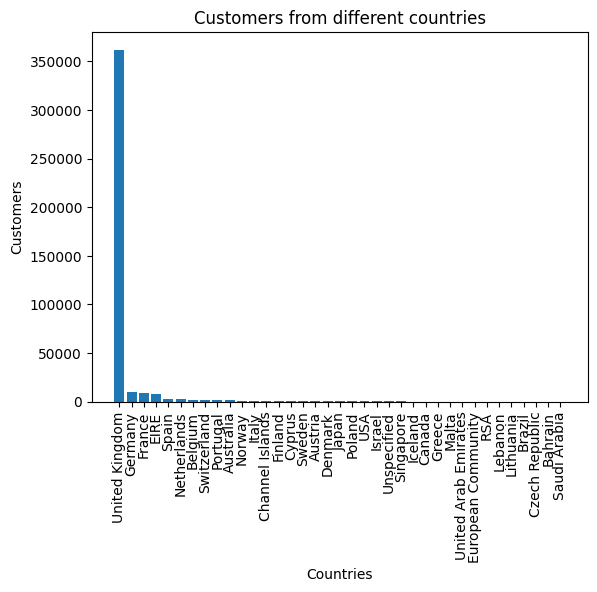

In [32]:
customer_countries = df['Country'].value_counts().to_dict()

x = customer_countries.keys()
y = customer_countries.values()
plt.bar(x, y)
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Customers')
plt.title('Customers from different countries')
plt.show()

In [33]:
merged_df['Country'].value_counts()

Country
United Kingdom          3950
Germany                   95
France                    87
Spain                     29
Belgium                   24
Switzerland               20
Portugal                  19
Italy                     15
Finland                   12
Norway                    10
Netherlands                9
Austria                    9
Channel Islands            9
Australia                  9
Sweden                     8
Japan                      8
Denmark                    8
Cyprus                     7
Poland                     6
USA                        4
Canada                     4
Greece                     4
Israel                     4
Unspecified                4
EIRE                       3
United Arab Emirates       2
Bahrain                    2
Malta                      2
Saudi Arabia               1
Singapore                  1
Iceland                    1
RSA                        1
Lebanon                    1
Brazil                     1
Czech 

### **We can see that we have the most number of customers from UK, and other values are far away from those values. So, we can extract a new feature from here.**

In [34]:
merged_df['United Kingdom or Not'] = merged_df['Country'] == 'United Kingdom'
encoded = [1 if merged_df.iloc[i]["United Kingdom or Not"] else 0 for i in range(len(merged_df))]
merged_df["United Kingdom or Not"] = encoded
merged_df.head()

,CustomerID,Revenue_given,Frequency,Recency,Country,United Kingdom or Not
0,12346,0.00,2,326,United Kingdom,1
1,12347,4310.00,182,40,Iceland,0
2,12348,1797.24,31,76,Finland,0
3,12349,1757.55,73,19,Italy,0
4,12350,334.40,17,311,Norway,0


## **Dropping Country column**

In [35]:
merged_df = merged_df.drop(['Country'], axis=1)
merged_df.head(), merged_df.shape

(   CustomerID  Revenue_given  Frequency  Recency  United Kingdom or Not
 0       12346           0.00          2      326                      1
 1       12347        4310.00        182       40                      0
 2       12348        1797.24         31       76                      0
 3       12349        1757.55         73       19                      0
 4       12350         334.40         17      311                      0,
 (4372, 5))

## **Exporting the processed dataset**

In [36]:
merged_df.to_csv("preprocessed_dataset.csv", index=False)